In [1]:
# import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# allow more collumns and rows to be seen
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
import scipy.stats as stats
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Data Cleaning

In [2]:
df = pd.read_csv('decoded_mushrooms.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# sns.catplot(x='cap-shape', col = 'class', hue='class', kind="count", data=df)

In [7]:
#bar plot, side by side bar plot - one is poisionous and the side by side bar edible
# for i, column in enumerate(df):
#     sns.catplot(x= column, col = 'class', hue='class', kind="count", data=df)

## Bar Plots 

C:\Users\berns\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\berns\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\berns\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\berns\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\berns\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not

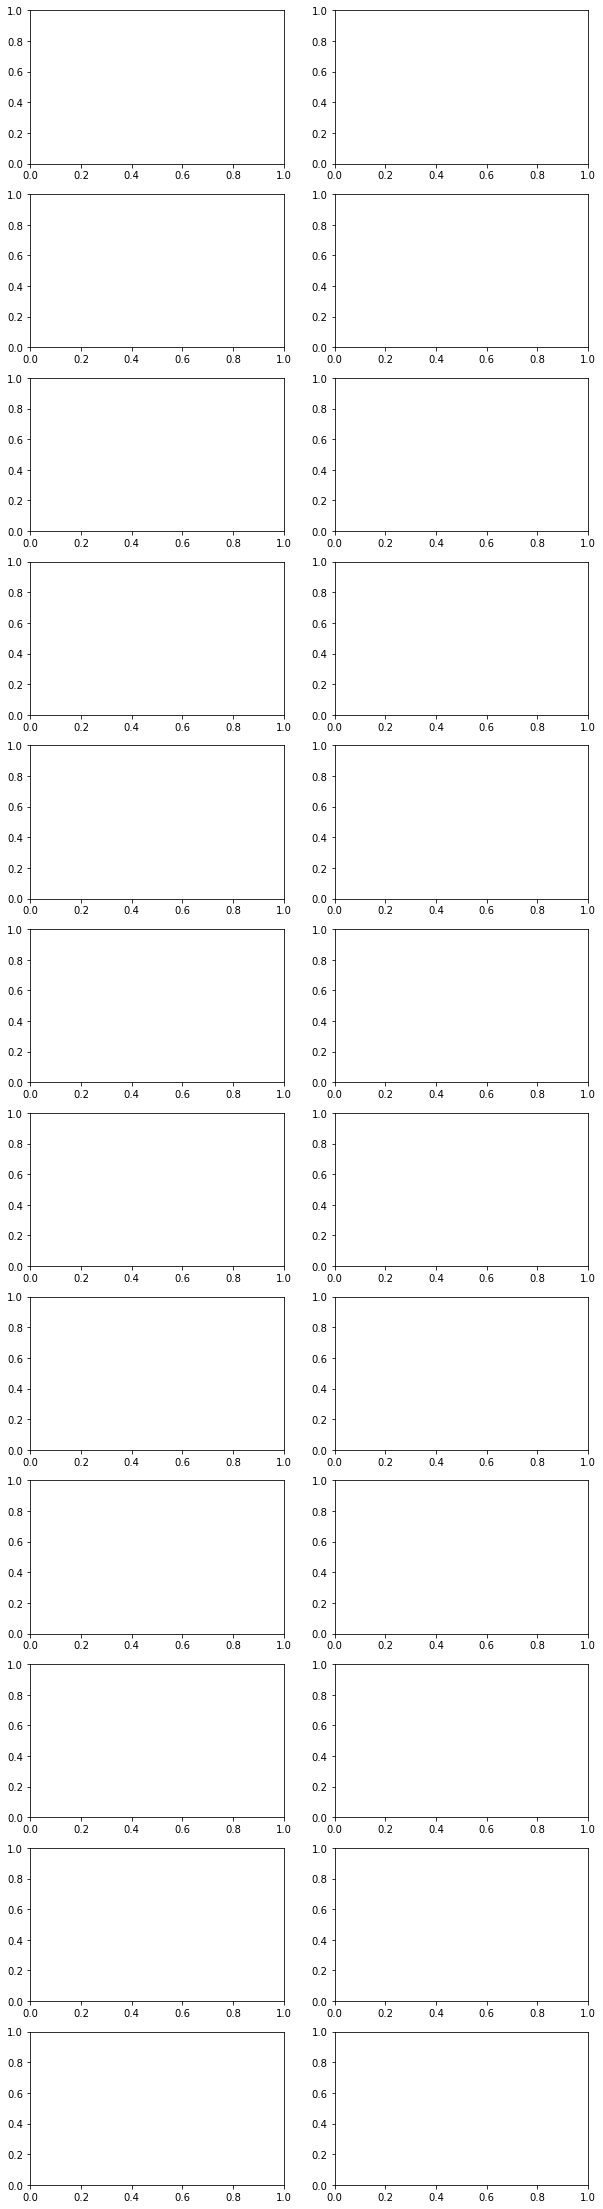

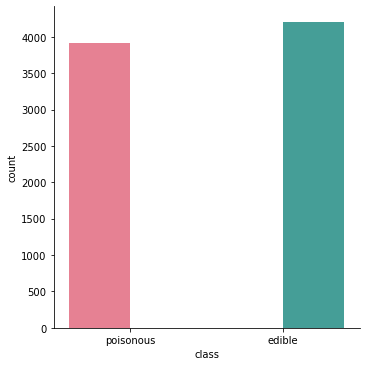

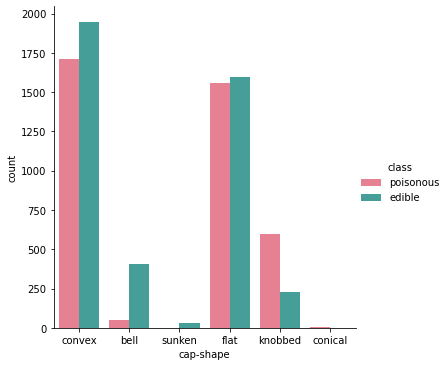

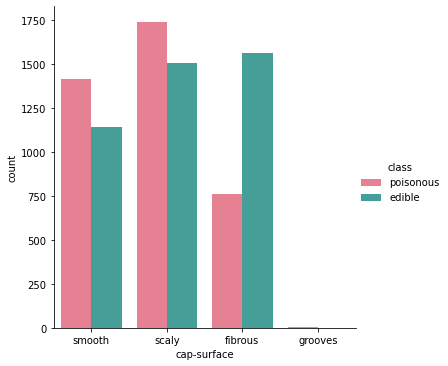

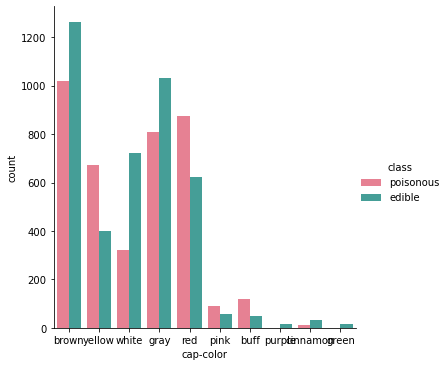

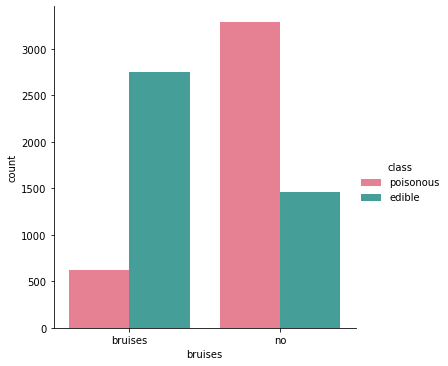

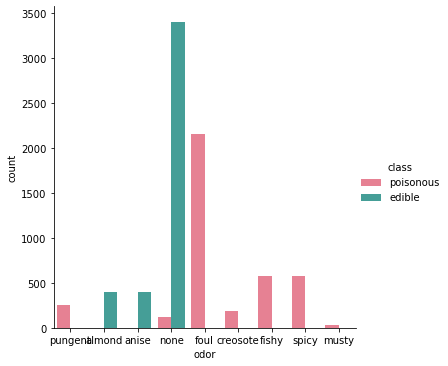

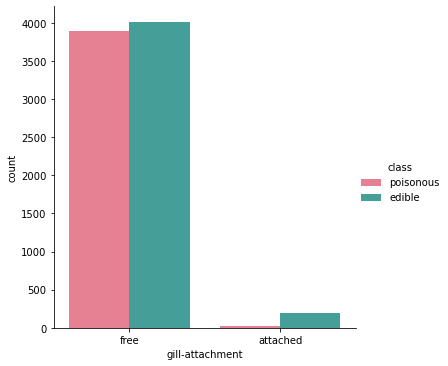

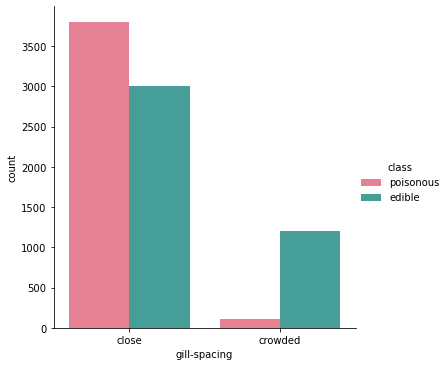

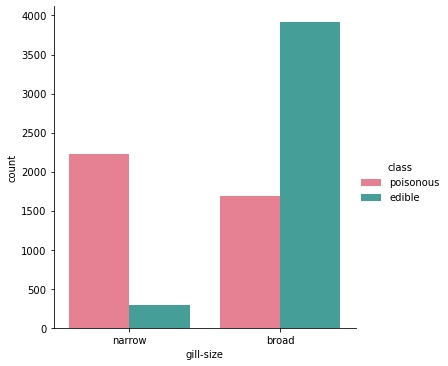

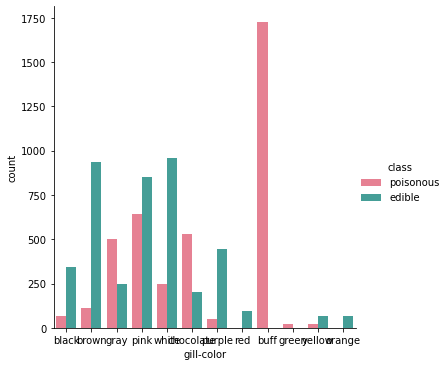

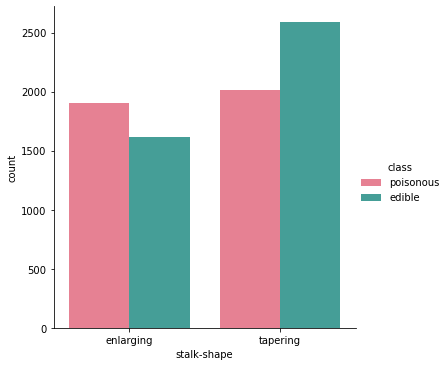

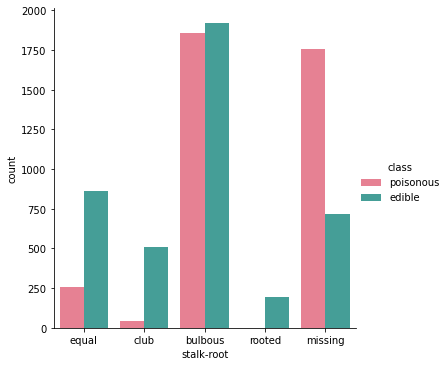

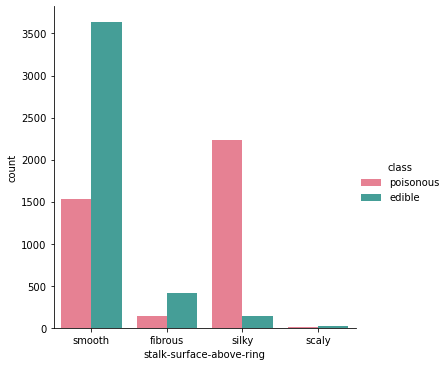

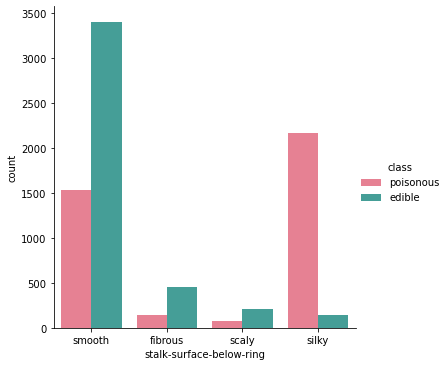

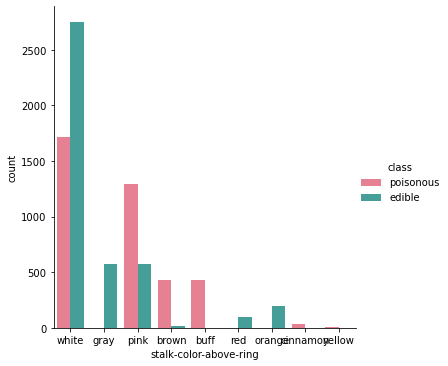

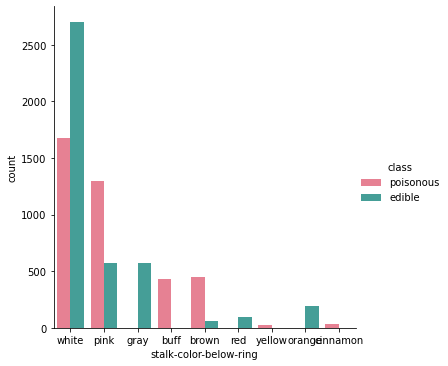

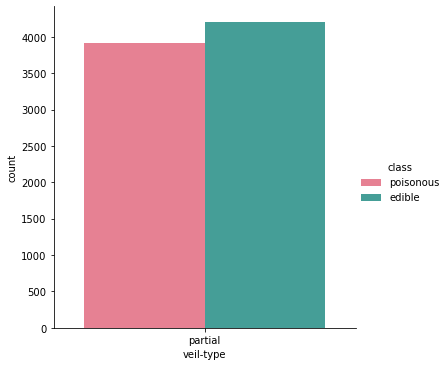

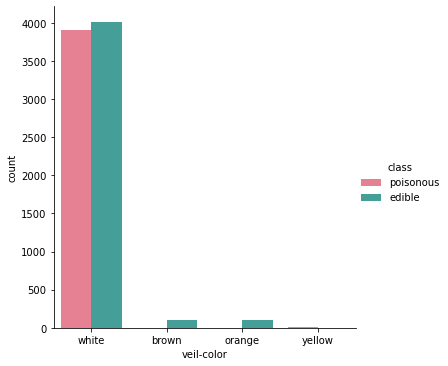

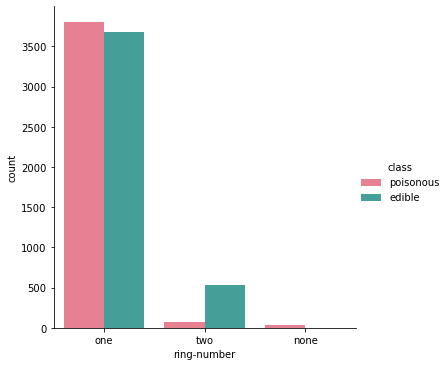

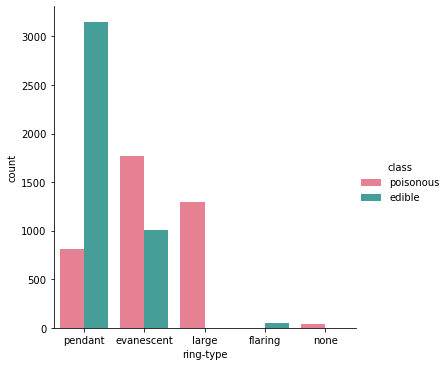

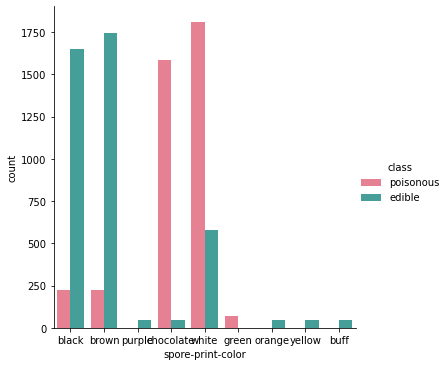

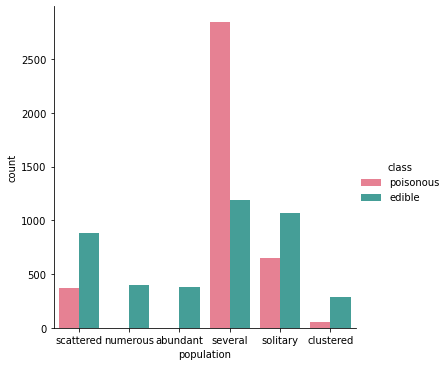

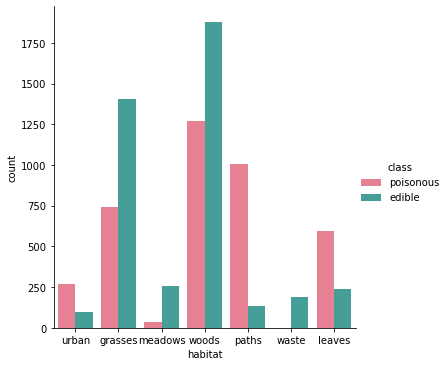

In [11]:
fig, axes = plt.subplots (ncols = 2, nrows = 12, figsize = (10, 40))

for i, column in enumerate(df):
    ax = axes[i//2][i%2]
    fig = sns.catplot(x=column, hue="class", kind='count', data=df, palette = 'husl', ax=ax)
#     plt.close()
    
plt.savefig('bargraphsPE.jpg')    

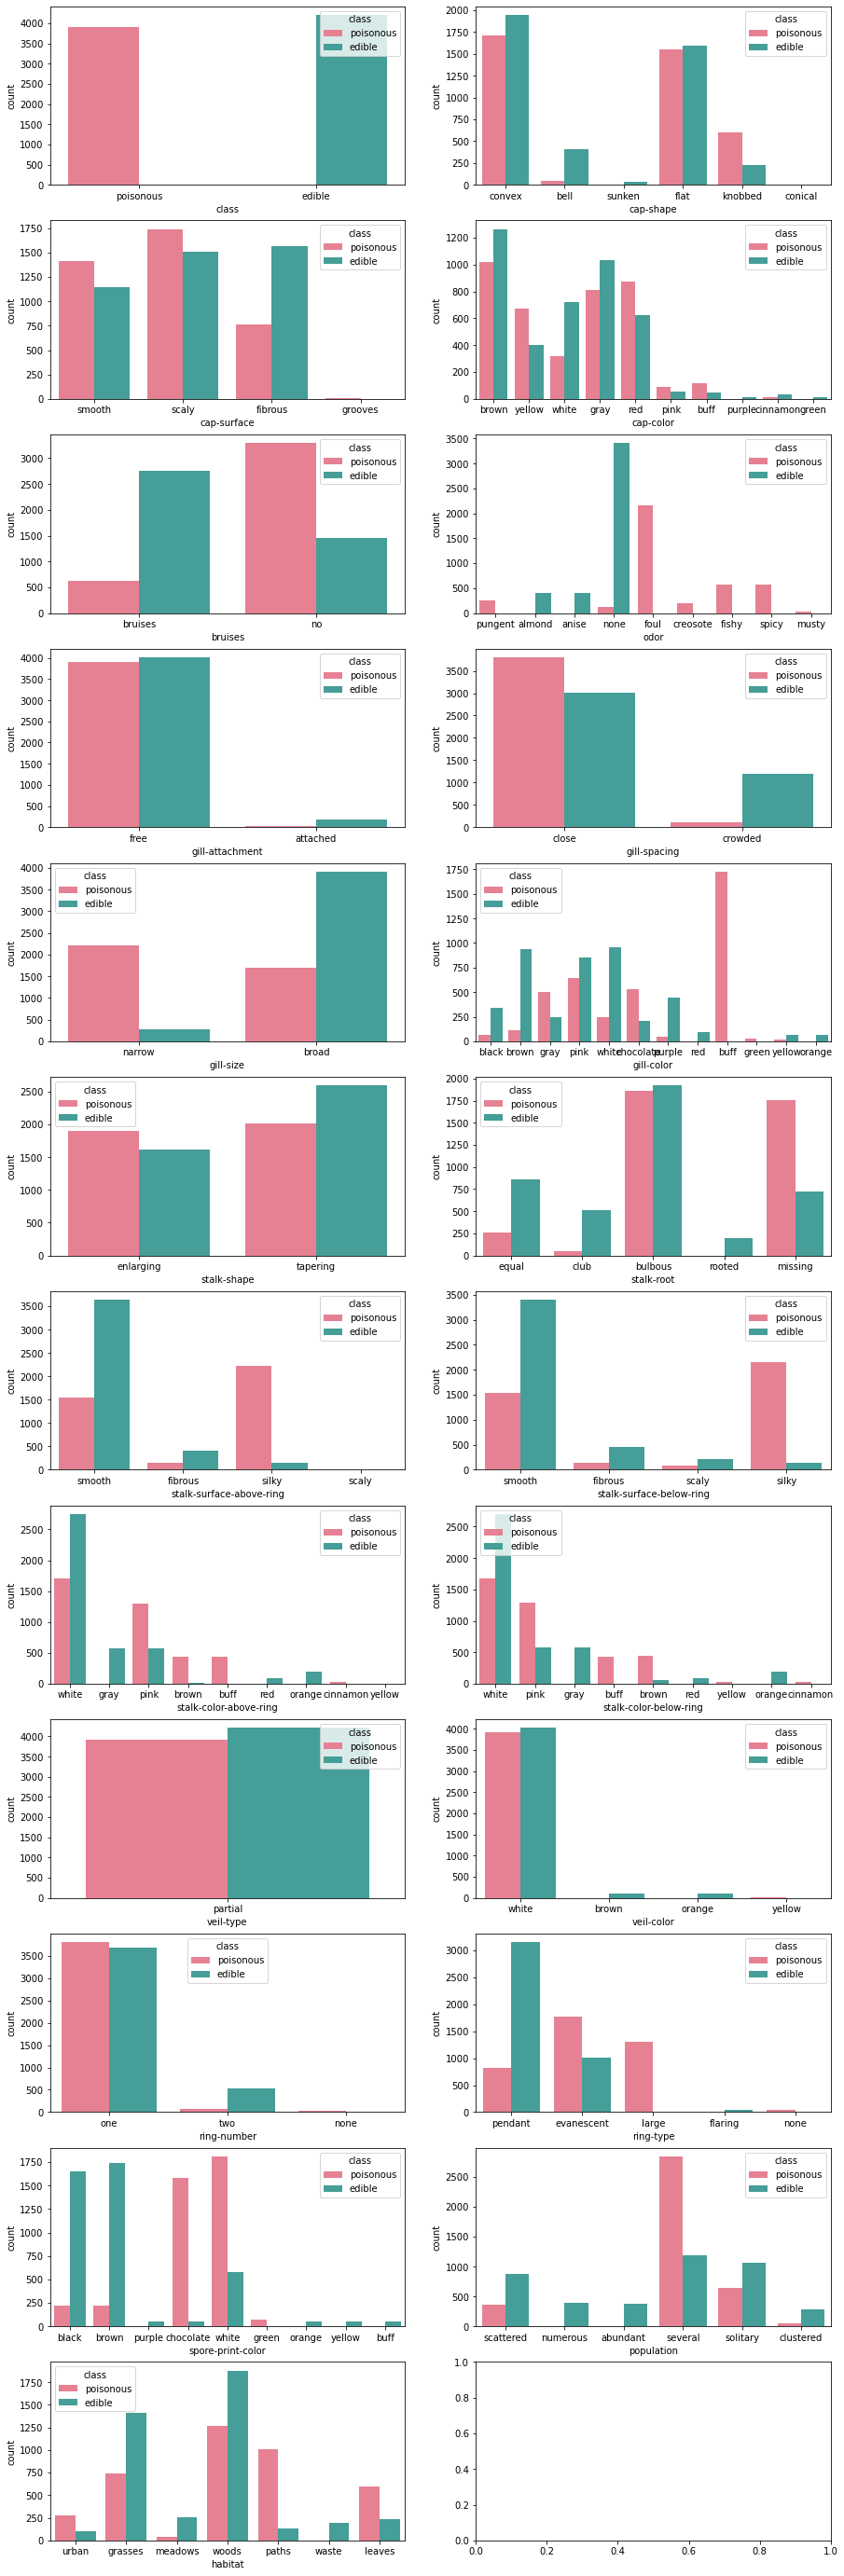

In [13]:
fig, axes = plt.subplots (ncols = 2, nrows = 12, figsize = (15, 50))

for i, column in enumerate(df):
    ax = axes[i//2][i%2]
    fig = sns.countplot(x=column, hue="class", data=df, palette = 'husl', ax=ax)
#     plt.close()

## Bar Graph Explanations

cap shape: Mushroom cap shapes that are either convex or flat don't seem to be very good indicators of edibility. That being said however, we can also see that bell shaped caps are more likely to be edible while knob shaped caps are more likely to be poisonous. Though there isn't much to get form sunken or conical shaped mushroom caps but its very unlikely that they would be poisonous or edible, respectively.

cap surface: From this bar graph, we can see that cap surfaces for poisonous and edible mushrooms can really vary. But fibrous cap surfaces are more likely to be edible while a mushroom cap surface with grooves, from what we know, will most likely be poisonous.

cap color: Cap color, according to the distribution of the bar graph, can vary between poisonous and edible mushrooms. However, green and purple mushroom caps are more so characteristics of edible mushrooms.

bruises: Seems that edible mushrooms tend to have more bruises as opposed to poisonous mushrooms which are typically bruise-free.

odor: Interestingly, things that we would typically consider "good" smells are for mainly for edible mushrooms. All other less pleasant smelling mushrooms are indications of a poisonous species.

gill attachment: Gill-attachment doesn't really give us mush information. The proportions of edible to poisonous mushrooms for free and attached gills appear to be very similar according to the graph.

gill spacing: Gill-spacing seem to appear more crowded for edible mushrooms and close for poisonous ones. However, this bar graph isn't the best provider of predictive information.

gill size: A narrow gill size looks more closely associated with poisonous mushrooms while broad gills are more associated with the other.

gill color: For gill color, the colors that stand out the most for being an indicator of being poisonous or edible are brown, purple, red, and orange, or buff and green, respectfully.

stalk shape: There doesn't seem to be mush difference in the distribution of mushrooms by edibility for stalk shape. This may not be helpful in a predictive model.

stalk-root: If the root is rooted it's edible. If the root is equal, club, missing, or bulbous it's more likely to be poisonous.   

Stalk-surface-above-ring: Similarly to the stalk surface below the ring, smooth, fibrous, and scaly are more likely to be edible, but they are not good indicators when determining if a mushrooms will be poisonous or edible. The silky surface is more likely to be poisonous.  

Stalk-surface-below-ring: Stalk surface below the ring are not good for differentiating between poisonous and edible mushrooms. Smooth, fibrous, and scaly surfaces below the ring are more likely to be edible. Meanwhile a silky surface is more likely to be poisonous.   

Stalk-color-above-ring: Similar to stalk colors below the ring, pink and white stalk colors above the ring are not good indicators of whether a mushroom is poisonous or edible. Gray,red, or orange colors above the ring are edible. Buff, yellow, and cinnamon are poisonous, and brown is almost all poisonous.  

Stalk-color-below-ring: White and pink stalk colors are poor indicators when determining whether a mushroom is poisonous or edible. The white color is more likely to be edible. The pink color is more likely to be poisonous. Gray or Orange as the stalk color below the ring means the mushroom is edible. Meanwhile a buff or red stalk color below the ring shows the mushroom is poisonous. The brown color is more likely to be poisonous. a Cinnamon color below the ring means the mushroom is edible.    

Veil-type: Veil-type is not a good indicator of whether a mushroom is poisonous or not. 

Veil-color: Mushrooms with brown and orange veils are edible. Yellow viels are a danger sign. Mushrooms with a white veil are not good indicators of whether the mushroom is poisonous or edible.

Ring number: There's a lot of uncertainty with one ring. One ring could be edible or poisonous. Two rings mushrooms are likely to be edible, but we can't be positive. Mushrooms without rings are poisonous. 

Ring-type: Large rings and no rings are a sign the mushroom is poisonous. Flaring mushrooms are edible. Pendant mushrooms are more likely to be edible, but beware. Evanescent mushrooms are more likely to be poisonous, but many are edible.   

Spore-print-color: Buff, yellow, orange, and purple mushrooms are edible. Green mushrooms are poisonous. Black and brown mushrooms are mostly edible, but not entirely. Chocolate and white colored mushrooms are mostly poisonous.

Population: The population graph demonstrates edible mushrooms can be found in numerous areas and abundantly. There are several areas were mushrooms are poisonous. Both poisonous and edible mushrooms can be found scattered, in solitary, and clustered.

Habitat: From the habitat graph one can see that waste has edible mushrooms. Wood and grass areas are more likely to have edible mushrooms, but a lot of mushrooms found in the woody and grassy areas are poisonous. Paths are likely to have poisonous mushrooms.  

In [9]:
# df['cap-shape'].unique()
# df['cap-shape'] = df['cap-shape'].map({'convex':1, 'bell':2, 'sunken':3, 'flat':4, 'knobbed':5, 'conical':6})
# df['cap-surface'].unique()
# df['cap-surface'] = df['cap-surface'].map({'smooth':1, 'scaly':2, 'fibrous':3, 'grooves':4})
# df['cap-color'].unique()
# df['cap-color'] = df['cap-color'].map({'brown':1, 'yellow':2, 'white':3, 'gray':4, 'red':5, 'pink':6, 'buff':7, 
#                                        'purple':8, 'cinnamon':9, 'green': 10})
# df['bruises'].unique()
# df['bruises'] = df['bruises'].map({'bruises':1, 'no':2})
# df['odor'].unique()
# df['odor'] = df['odor'].map({'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
#                                        'spicy':8, 'musty': 9})
# df['gill-attachment'].unique()
# df['gill-attachment'] = df['gill-attachment'].map({'free':1, 'attached':2})
# df['gill-spacing'].unique()
# df['gill-spacing'] = df['gill-spacing'].map({'close':1, 'crowded':2})
# df['gill-size'].unique()
# df['gill-size'] = df['gill-size'].map({'narrow':1, 'broad':2})
# df['gill-color'].unique()
# df['gill-color'] = df['gill-color'].map({'black':1, 'brown':2, 'gray':3, 'pink':4, 'white':5, 'chocolate':6, 'purple':7, 
#                                        'green':8, 'buff': 9, 'red':10, 'yellow':11, 'orange':12})
# df['stalk-shape'].unique()
# df['stalk-shape'] = df['stalk-shape'].map({'enlarging':1, 'tapering':2})
# df['stalk-root'].unique()
# df['stalk-root'] = df['stalk-root'].map({'equal':1, 'club':2, 'bulbous':3, 'rooted':4, 'missing':5})
# df['stalk-surface-above-ring'].unique()
# df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'smooth':1, 'fibrous':2, 'silky':3, 'scaly':4})
# df['stalk-surface-below-ring'].unique()
# df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'smooth':1, 'fibrous':2, 'scaly':3, 'silky':4})
# df['stalk-color-above-ring'].unique()
# df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'white':1, 'gray':2, 'pink':3, 'brown':4, 'buff':5, 'red':6,
#                                                                  'orange':7, 'cinnamon':8, 'yellow': 9})
# df['stalk-color-below-ring'].unique()
# df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'white':1, 'pink':2, 'gray':3, 'buff':4, 'brown':5,
#                                                                     'red':6, 'yellow':7, 'orange':8, 'cinnamon': 9})
# df['veil-type'].unique()
# df['veil-type'] = df['veil-type'].map({'partial':1})
# df['veil-color'].unique()
# df['veil-color'] = df['veil-color'].map({'white':1, 'brown':2, 'orange':3, 'yellow':4})
# df['ring-number'].unique()
# df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})
# df['ring-type'].unique()
# df['ring-type'] = df['ring-type'].map({'pendant':1, 'evanescent':2, 'large':3, 'flaring':4, 'none':5})
# df['spore-print-color'].unique()
# df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
#                                                        'orange':7, 'yellow':8, 'buff': 9})
# df['population'].unique()
# df['population'] = df['population'].map({'scattered':1, 'numerous':2, 'abundant':3, 'several':4, 'solitary':5, 'clustered':6})
# df['habitat'].unique()
# df['habitat'] = df['habitat'].map({'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7})
# df['class'].unique()
# df['class'] = df['class'].map({'poisonous':1, 'edible':2})

In [11]:
# sns.catplot(x="class", y="habitat", hue="class", kind="bar", data=df)

In [13]:
# df.columns

In [12]:
# sns.catplot(x='cap-shape', hue="class", kind='count', data=df, palette = 'husl')

In [14]:
# for i, column in enumerate(df):
#     sns.catplot(x=column, hue="class", kind='count', data=df, palette = 'husl')

# Statistically Testing

## Rings 

In [17]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

table = [[len(df.loc[df['ring-number'] == 'one'].loc[df['class'] == 'poisonous']), len(df.loc[df['ring-number'] == 'one'].loc[df['class'] == 'edible'])],
         [len(df.loc[df['ring-number'] == 'two'].loc[df['class'] == 'poisonous']), len(df.loc[df['ring-number'] == 'two'].loc[df['class'] == 'edible'])],
         [len(df.loc[df['ring-number'] == 'none'].loc[df['class'] == 'poisonous']), len(df.loc[df['ring-number'] == 'none'].loc[df['class'] == 'edible'])]]
print(table)
         
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

stat    

[[3808, 3680], [72, 528], [36, 0]]
dof=2
[[3609.42983752 3878.57016248]
 [ 289.21713442  310.78286558]
 [  17.35302806   18.64697194]]


374.7368308267116

## Spore Print Color 

The Chi-Squared test is used to check the significance of spore print color to see if it's classified as edible or poisonous.

In [18]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [21]:
table = [[len(df.loc[df['spore-print-color'] == 'black'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'black'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'brown'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'brown'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'purple'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'purple'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'chocolate'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'chocolate'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'white'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'white'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'green'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'green'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'orange'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'orange'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'yellow'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'yellow'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'buff'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'buff'].loc[df['class'] == 'edible'])]]
print(table)

[[224, 1648], [224, 1744], [0, 48], [1584, 48], [1812, 576], [72, 0], [0, 48], [0, 48], [0, 48]]


In [22]:
lst1, lst2 = [], []
for row in table:
    lst1.append(row[0])
    lst2.append(row[1])
lst = [lst1,lst2]

In [23]:
lst

[[224, 224, 0, 1584, 1812, 72, 0, 0, 0],
 [1648, 1744, 48, 48, 576, 0, 48, 48, 48]]

In [24]:
stat, p, dof, expected = chi2_contingency(lst)
print('dof=%d' % dof)
print(expected)

dof=8
[[ 902.35745938  948.63220089   23.13737075  786.67060561 1151.08419498
    34.70605613   23.13737075   23.13737075   23.13737075]
 [ 969.64254062 1019.36779911   24.86262925  845.32939439 1236.91580502
    37.29394387   24.86262925   24.86262925   24.86262925]]


degrees of freedom = 9-1 = 8

In [25]:
stat

4602.033170084604

In [26]:
p

0.0

In [27]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=15.507, stat=4602.033
Dependent (reject H0)


In [28]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


The 95% confidence interval has a critical value of 15.5. The stat 4602 largely exceeds the critical value and the p-value is 0. It can be assumed spore-color-print is statistically significant.

## Odor 

In [31]:
table = [[len(df.loc[df['odor'] == 'pungent'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'pungent'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'almond'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'almond'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'anise'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'anise'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'none'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'none'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'foul'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'foul'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'creosote'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'creosote'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'fishy'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'fishy'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'spicy'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'spicy'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'musty'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'musty'].loc[df['class'] == 'edible'])]]
print(table)

[[256, 0], [0, 400], [0, 400], [120, 3408], [2160, 0], [192, 0], [576, 0], [576, 0], [36, 0]]


In [34]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=8
[[ 123.39931068  132.60068932]
 [ 192.81142294  207.18857706]
 [ 192.81142294  207.18857706]
 [1700.59675037 1827.40324963]
 [1041.1816839  1118.8183161 ]
 [  92.54948301   99.45051699]
 [ 277.64844904  298.35155096]
 [ 277.64844904  298.35155096]
 [  17.35302806   18.64697194]]


In [35]:
print(stat)
print(p)

7659.726740165338
0.0


In [36]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=15.507, stat=7659.727
Dependent (reject H0)


In [37]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


The 95% confidence interval has a critical value of 15.5. The stat 7659.7 largely exceeds the critical value and the p-value is 0. It can be assumed spore-color-print is statistically significant.

# Feature Engineering

In [41]:
#needs to be edited based on bar graphs

## Feature One

For feature one, looked at the habitat column and split it based on if each feature has human interaction or not.

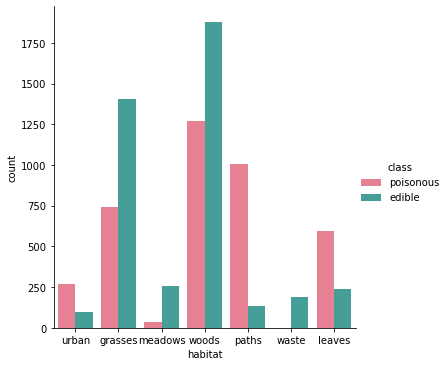

In [44]:
sns.catplot(x='habitat', hue="class", kind='count', data=df, palette = 'husl')

In [38]:
df['human_interference'] = np.where((df['habitat'] == 'urban') | (df['habitat'] == 'paths') | (df['habitat'] == 'waste'), 0, 1)

In [39]:
df['human_interference']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: human_interference, Length: 8124, dtype: int32

In [40]:
df['human_interference'].value_counts()

1    6420
0    1704
Name: human_interference, dtype: int64

1704 human areas and 6420 nature areas

## Feature Two 

For feature 2 split on what was considered good odors and bad odors.

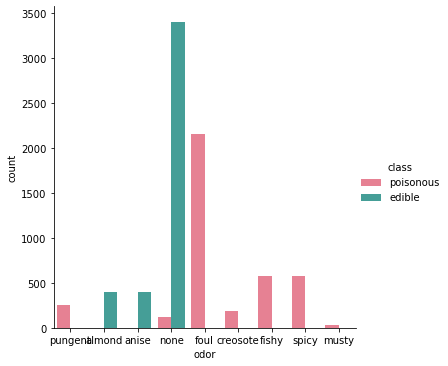

In [45]:
sns.catplot(x='odor', hue="class", kind='count', data=df, palette = 'husl')

In [42]:
df['smell_quality'] = np.where((df['odor'] == 'almond') | (df['odor'] == 'anise') | (df['odor'] == 'none') | (df['odor'] == 'spicy'), 0, 1)

0 for fine smell 1 for bad smell

In [43]:
df['smell_quality'].value_counts()

0    4904
1    3220
Name: smell_quality, dtype: int64

4904 smell fine and 3220 smell bad

## Feature 3 

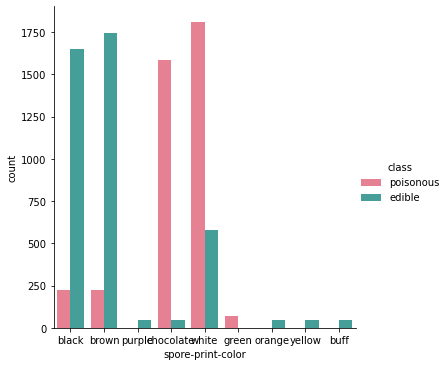

In [47]:
sns.catplot(x='spore-print-color', hue="class", kind='count', data=df, palette = 'husl')

Chlorophyllum molybdites is responsible for the mushrooms green color.

In [48]:
df['c_molybdites'] = np.where((df['spore-print-color'] == 'green'), 0, 1)

edible

In [50]:
df['spore-edible'] = np.where((df['spore-print-color'] == 'purple') | (df['spore-print-color'] == 'orange') |
                              (df['spore-print-color'] == 'yellow') | (df['spore-print-color'] == 'buff'), 0 , 1)

In [51]:
df['spore-edible'].value_counts()

1    7932
0     192
Name: spore-edible, dtype: int64

0 edible 1 poisonous

## Feature 4 

According to the bar graph mushrooms without rings are poisonous.

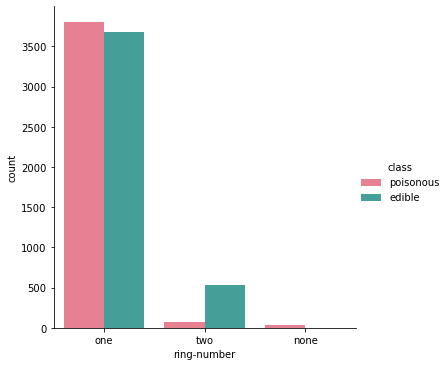

In [52]:
sns.catplot(x='ring-number', hue="class", kind='count', data=df, palette = 'husl')

In [53]:
df['no_rings'] = np.where(df['ring-number'] == 'none', 0, 1)

0 no rings, 1 rings

In [54]:
df['no_rings'].value_counts()

1    8088
0      36
Name: no_rings, dtype: int64

# Modeling

In [14]:
df['cap-shape'].unique()
df['cap-shape'] = df['cap-shape'].map({'convex':1, 'bell':2, 'sunken':3, 'flat':4, 'knobbed':5, 'conical':6})
df['cap-surface'].unique()
df['cap-surface'] = df['cap-surface'].map({'smooth':1, 'scaly':2, 'fibrous':3, 'grooves':4})
df['cap-color'].unique()
df['cap-color'] = df['cap-color'].map({'brown':1, 'yellow':2, 'white':3, 'gray':4, 'red':5, 'pink':6, 'buff':7, 
                                       'purple':8, 'cinnamon':9, 'green': 10})
df['bruises'].unique()
df['bruises'] = df['bruises'].map({'bruises':1, 'no':2})
df['odor'].unique()
df['odor'] = df['odor'].map({'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
                                       'spicy':8, 'musty': 9})
df['gill-attachment'].unique()
df['gill-attachment'] = df['gill-attachment'].map({'free':1, 'attached':2})
df['gill-spacing'].unique()
df['gill-spacing'] = df['gill-spacing'].map({'close':1, 'crowded':2})
df['gill-size'].unique()
df['gill-size'] = df['gill-size'].map({'narrow':1, 'broad':2})
df['gill-color'].unique()
df['gill-color'] = df['gill-color'].map({'black':1, 'brown':2, 'gray':3, 'pink':4, 'white':5, 'chocolate':6, 'purple':7, 
                                       'green':8, 'buff': 9, 'red':10, 'yellow':11, 'orange':12})
df['stalk-shape'].unique()
df['stalk-shape'] = df['stalk-shape'].map({'enlarging':1, 'tapering':2})
df['stalk-root'].unique()
df['stalk-root'] = df['stalk-root'].map({'equal':1, 'club':2, 'bulbous':3, 'rooted':4, 'missing':5})
df['stalk-surface-above-ring'].unique()
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'smooth':1, 'fibrous':2, 'silky':3, 'scaly':4})
df['stalk-surface-below-ring'].unique()
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'smooth':1, 'fibrous':2, 'scaly':3, 'silky':4})
df['stalk-color-above-ring'].unique()
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'white':1, 'gray':2, 'pink':3, 'brown':4, 'buff':5, 'red':6,
                                                                 'orange':7, 'cinnamon':8, 'yellow': 9})
df['stalk-color-below-ring'].unique()
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'white':1, 'pink':2, 'gray':3, 'buff':4, 'brown':5,
                                                                    'red':6, 'yellow':7, 'orange':8, 'cinnamon': 9})
df['veil-type'].unique()
df['veil-type'] = df['veil-type'].map({'partial':1})
df['veil-color'].unique()
df['veil-color'] = df['veil-color'].map({'white':1, 'brown':2, 'orange':3, 'yellow':4})
df['ring-number'].unique()
df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})
df['ring-type'].unique()
df['ring-type'] = df['ring-type'].map({'pendant':1, 'evanescent':2, 'large':3, 'flaring':4, 'none':5})
df['spore-print-color'].unique()
df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
                                                       'orange':7, 'yellow':8, 'buff': 9})
df['population'].unique()
df['population'] = df['population'].map({'scattered':1, 'numerous':2, 'abundant':3, 'several':4, 'solitary':5, 'clustered':6})
df['habitat'].unique()
df['habitat'] = df['habitat'].map({'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7})
df['class'].unique()
df['class'] = df['class'].map({'poisonous':1, 'edible':2})

In [15]:
target = df['class']
relevant_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first = True)

In [17]:
# fit a logistic regression model and store the class predictions
logreg = LogisticRegression(random_state=42)
X = df[relevant_columns]
y = target
logreg.fit(X, y)
df['mushroom_pred_class'] = logreg.predict(X)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
mushroom_pred_class         0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, random_state = 21)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#grid search log regression
#check c value - regularization
#check solver - lgbs, sag, etc
#check max iter 
#penalty - l1 or l2

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [ ]:
print(y_train_pred)
print(y_test_pred)

In [ ]:
df['class'].value_counts()[2]/(df['class'].value_counts()[2] + df['class'].value_counts()[1])